<a href="https://colab.research.google.com/github/snhsadi/snhsadi/blob/main/NATA_ML_training_shared.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NATA Training- October,2025**

In [ ]:
# # if we use content from own drive
# from google.colab import drive
# drive.mount('/content/drive')

# if we use shared drive content
!pip install gdown

print("Drive Mount Successful")

Drive Mount Successful


Cell 2: Imports and Paths

In [ ]:
import gdown
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from pathlib import Path
from PIL import Image

print("Success: All libraries imported successfully.")

Success: All libraries imported successfully.


Cell 3: Locate and Upload Image Data to colab space

In [ ]:
# 1. Download the data from the Google Drive link to Colab
folder_url = 'https://drive.google.com/drive/folders/1IgCNK22qElOwHbxq8pEswDeWvhAHJ2cz?usp=sharing'
output_folder = 'NATA_OCT_25_Data' # This is the new local folder for your data

print(f"Downloading data to /content/{output_folder}...")

# --- download
gdown.download_folder(folder_url, output=output_folder, quiet=True, use_cookies=False)
# -------------------------

print("\nSuccess: Download complete.")

# 2.  local file paths for the rest of the notebook to use
YIELD_DATA_CSV = os.path.join(output_folder, 'yield_data.csv')
DISTRICTS_GEOJSON = os.path.join(output_folder, 'districts.geojson')
LOCAL_IMG_DIR = os.path.join(output_folder, 'disease_images') # Path to the image folder

print("\n--- Local file paths are now set ---")
print(f"Yield CSV Path: {YIELD_DATA_CSV}")
print(f"GeoJSON Path: {DISTRICTS_GEOJSON}")
print(f"Image Folder Path: {LOCAL_IMG_DIR}")

# 3. Verify that a key file is accessible
try:
    pd.read_csv(YIELD_DATA_CSV).head(2)
    print("\nSuccess: Verification successful: 'yield_data.csv' is ready to use.")
except Exception as e:
    print(f"\nFailed Verification failed. Could not read the CSV file. Error: {e}")


Success: Download complete.

--- Local file paths are now set ---
Yield CSV Path: NATA_OCT_25_Data/yield_data.csv
GeoJSON Path: NATA_OCT_25_Data/districts.geojson
Image Folder Path: NATA_OCT_25_Data/disease_images

Success: Verification successful: 'yield_data.csv' is ready to use.


Cell 4: Load Yield Dataset

Success: 'yield_data.csv' loaded successfully. Here's a preview:
     district  year  rainfall_mm  temperature_c      ndvi  yield_ton_per_ha
0     Barguna  2015         2726      27.824270  0.486713             1.319
1     Barisal  2015         2478      26.703583  0.545125             2.207
2       Bhola  2015         3168      26.719173  0.486002             2.943
3   Jhalokati  2015         2534      26.908297  0.574780             2.229
4  Patuakhali  2015         3243      27.749139  0.452805             1.024

--- Summary Statistics ---
              year  rainfall_mm  temperature_c        ndvi  yield_ton_per_ha
count   384.000000   384.000000     384.000000  384.000000        384.000000
mean   2017.500000  2448.002604      27.195290    0.532903          2.386016
std       1.710053   742.045756       0.763539    0.063787          1.001442
min    2015.000000  1064.000000      25.459787    0.323477          0.000000
25%    2016.000000  1890.250000      26.636541    0.496542        

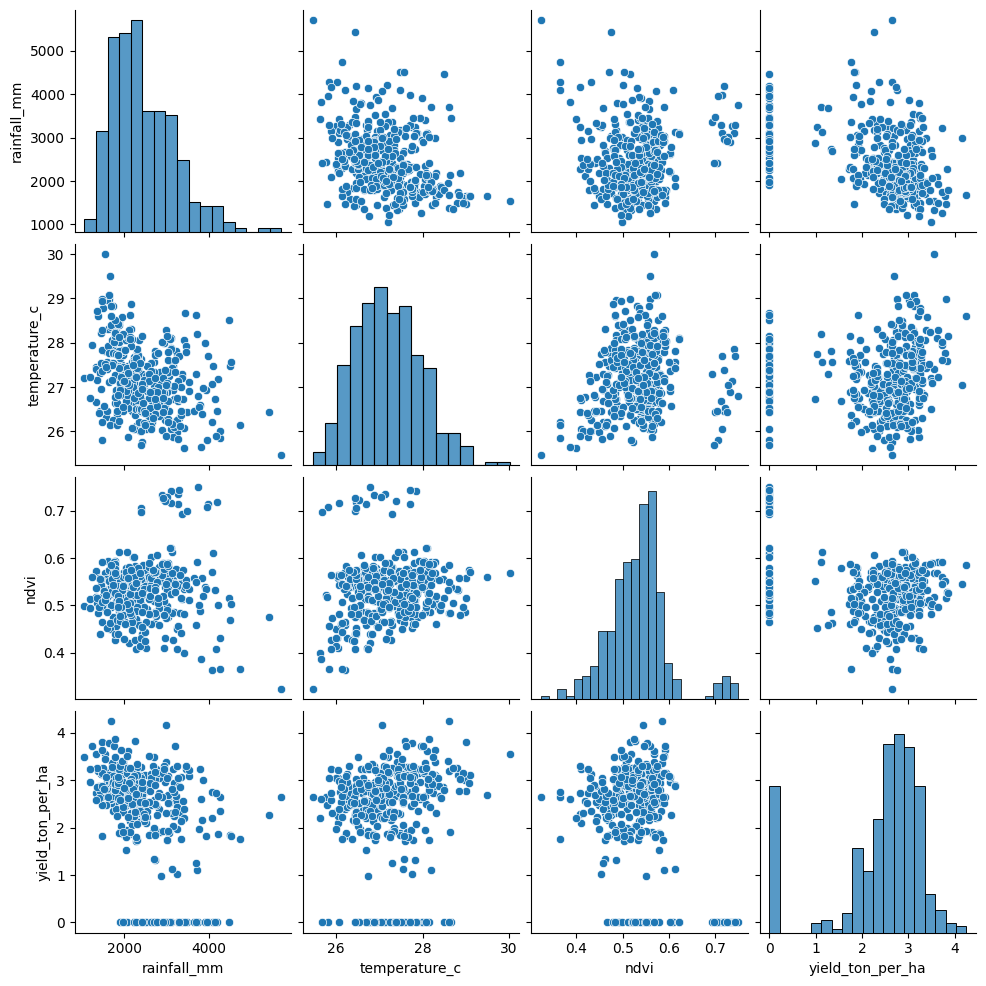

In [ ]:
# Load the yield dataset

df = pd.read_csv(YIELD_DATA_CSV)
print("Success: 'yield_data.csv' loaded successfully. Here's a preview:")
print(df.head())

print('\n--- Summary Statistics ---')
print(df.describe())

# Plot a quick exploratory analysis
print("\nPlotting pairplot...")
sns.pairplot(df[['rainfall_mm','temperature_c','ndvi','yield_ton_per_ha']])
plt.show()

Cell 5: Yield Prediction

Linear Regression R2: 0.5355022282199846
Linear Regression RMSE: 0.6047090067001271
Random Forest R2: 0.49718507319860383
Random Forest RMSE: 0.6291565185508811


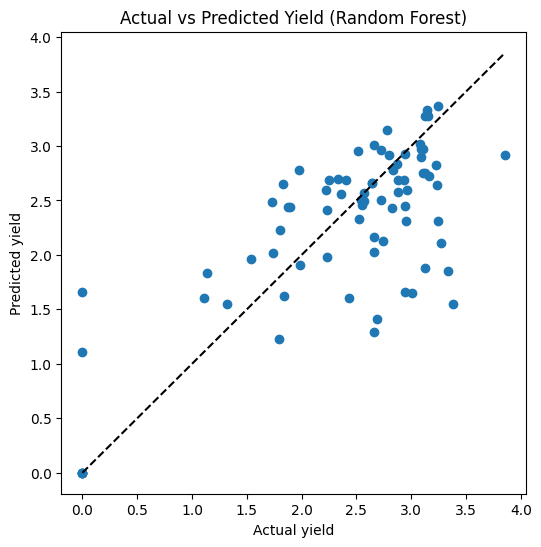

In [ ]:
X = df[['rainfall_mm','temperature_c','ndvi']]
y = df['yield_ton_per_ha']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Linear Regression R2:', r2_score(y_test, y_pred_lr))
print('Linear Regression RMSE:', mean_squared_error(y_test, y_pred_lr)**0.5)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest R2:', r2_score(y_test, y_pred_rf))
print('Random Forest RMSE:', mean_squared_error(y_test, y_pred_rf)**0.5)

# Plot actual vs predicted for Random Forest
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual yield')
plt.ylabel('Predicted yield')
plt.title('Actual vs Predicted Yield (Random Forest)')
plt.show()

Cell 6: Disease Classification

Healthy images: [PosixPath('NATA_OCT_25_Data/disease_images/healthy/healthy_1.png'), PosixPath('NATA_OCT_25_Data/disease_images/healthy/healthy_3.png'), PosixPath('NATA_OCT_25_Data/disease_images/healthy/healthy_6.png')]
Infected images: [PosixPath('NATA_OCT_25_Data/disease_images/infected/infected_6.png'), PosixPath('NATA_OCT_25_Data/disease_images/infected/infected_5.png'), PosixPath('NATA_OCT_25_Data/disease_images/infected/infected_2.png')]
Image classifier (color features) training accuracy: 1.0


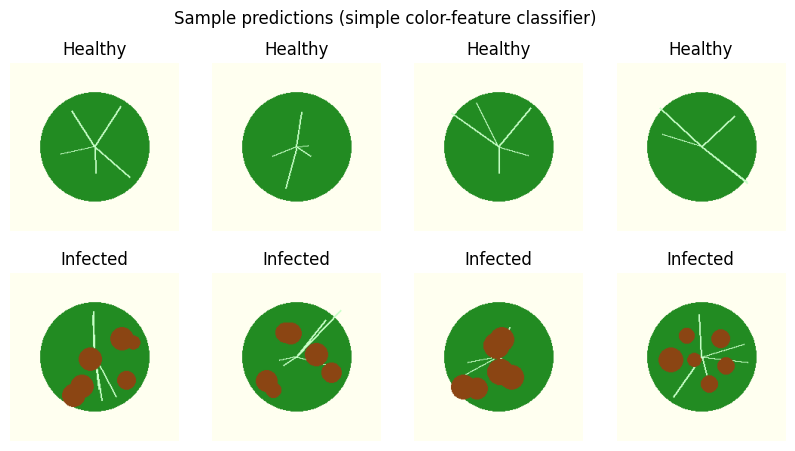

In [ ]:
# Path is now the *local* unzipped directory
img_dir = Path(LOCAL_IMG_DIR)
print('Healthy images:', list((img_dir/'healthy').glob('*.png'))[:3])
print('Infected images:', list((img_dir/'infected').glob('*.png'))[:3])

# Quick demo: compute simple color-based features (mean R,G,B) and classify using RandomForest
def image_features(path):
    img = Image.open(path).resize((128,128)).convert('RGB')
    arr = np.array(img)/255.0
    return arr.mean(axis=(0,1))

X_img = []
y_img = []
for p in (img_dir/'healthy').glob('*.png'):
    X_img.append(image_features(p))
    y_img.append(0)
for p in (img_dir/'infected').glob('*.png'):
    X_img.append(image_features(p))
    y_img.append(1)

X_img = np.array(X_img)
y_img = np.array(y_img)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_img, y_img)
print('Image classifier (color features) training accuracy:', clf.score(X_img, y_img))

# Show sample images with predicted labels
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,4, figsize=(10,5))
paths = list((img_dir/'healthy').glob('*.png'))[:4] + list((img_dir/'infected').glob('*.png'))[:4]
for ax, p in zip(axes.flatten(), paths):
    img = Image.open(p)
    ax.imshow(img)
    feat = image_features(p).reshape(1,-1)
    pred = clf.predict(feat)[0]
    ax.set_title(('Healthy' if pred==0 else 'Infected'))
    ax.axis('off')
plt.suptitle('Sample predictions (simple color-feature classifier)')
plt.show()

Cell 7: Mapping (GeoPandas)

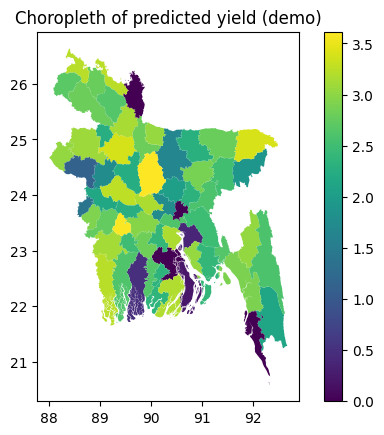

In [ ]:
try:
    import geopandas as gpd
    # Read the geojson file from its Google Drive path
    gdf = gpd.read_file(DISTRICTS_GEOJSON)

    # create a sample predictions dataframe by averaging predicted yields per district
    preds = pd.DataFrame({'district': df['district'].unique()})
    # use mean yield as placeholder for predicted values in this demo
    preds['predicted_yield'] = df.groupby('district')['yield_ton_per_ha'].mean().values

    gdf = gdf.merge(preds, on='district')

    gdf.plot(column='predicted_yield', legend=True)
    plt.title('Choropleth of predicted yield (demo)')
    plt.show()
except Exception as e:
    print('GeoPandas plotting failed. Exception:', e)

    # If plotting fails, save the predictions to the local Colab disk
    # You can download it from the file browser on the left.
    LOCAL_CSV_PATH = '/content/predicted_yield_by_district.csv'
    preds = pd.DataFrame({'district': df['district'].unique()})
    preds['predicted_yield'] = df.groupby('district')['yield_ton_per_ha'].mean().values
    preds.to_csv(LOCAL_CSV_PATH, index=False)
    print('Saved demo predictions to', LOCAL_CSV_PATH)